<a href="https://colab.research.google.com/github/Arina-Bas/Final/blob/main/Final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      65 non-null     int64  
 1   IF      65 non-null     int64  
 2   VW      65 non-null     float64
 3   FP      65 non-null     int64  
 4   Depth   65 non-null     float64
 5   Width   65 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.6 KB
None
T-stat: 1.1347511278422502
Critical values: [0.546 0.621 0.746 0.87  1.034]
Уровень значимости: [15

<ipython-input-7-c4c8f9bdb46e>:98: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


LinearRegression_Width
MAE 0.06267642469818065
RMSE 0.07393214762285355
MSE: 0.09
R²: -0.23
XGBboost_Depth
MAE 0.046768162433917716
RMSE 0.06676401475798617
MSE: 0.07
R²: -0.09
XGBboost_Width
MAE 0.04068412413963906
RMSE 0.05504889872935065
MSE: 0.09
R²: -0.23
SVR results
Depth: MSE = 0.0064209187311543075, R² = 0.8976055648859103
Width: MSE = 0.0048566472016041366, R² = 0.929963361230195


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Depth: MSE = 0.006260139283621864, R² = 0.9001695158401812
Width: MSE = 0.00546558524949156, R² = 0.9211819998665375


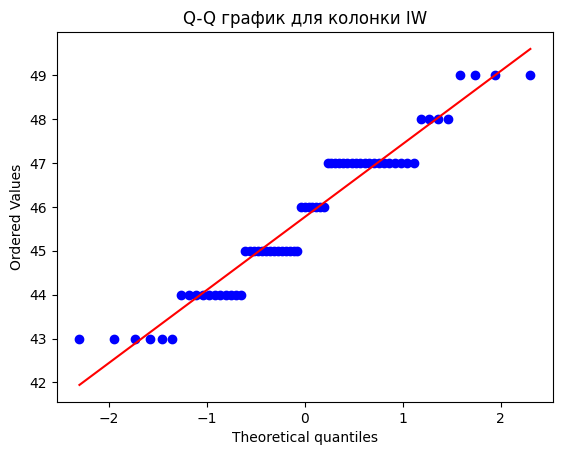

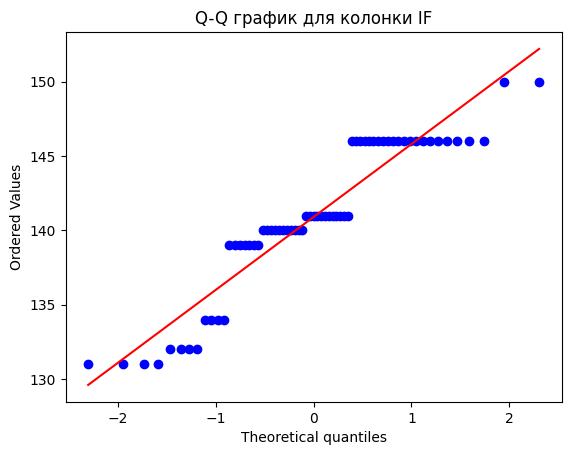

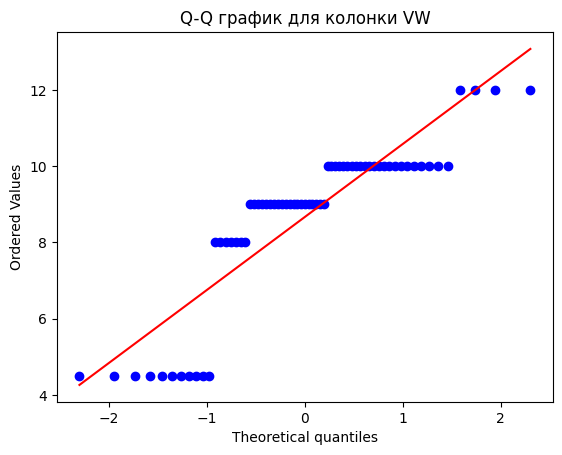

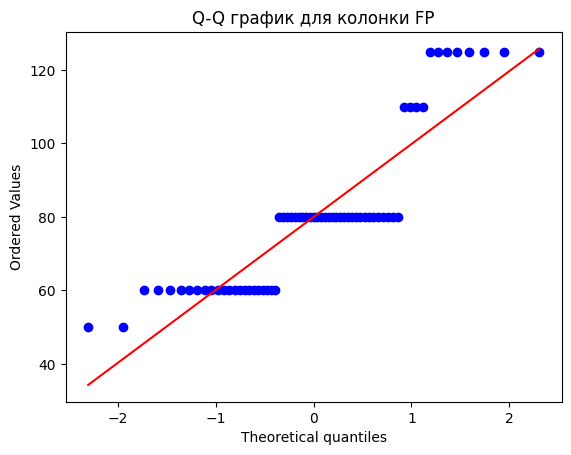

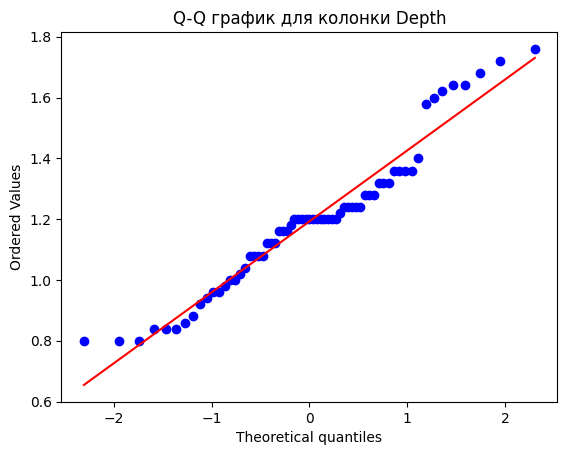

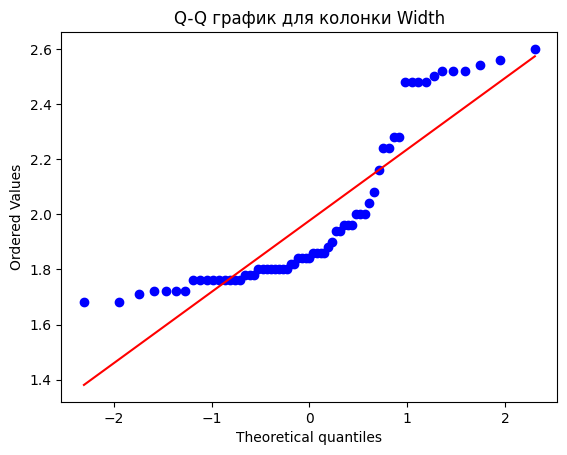

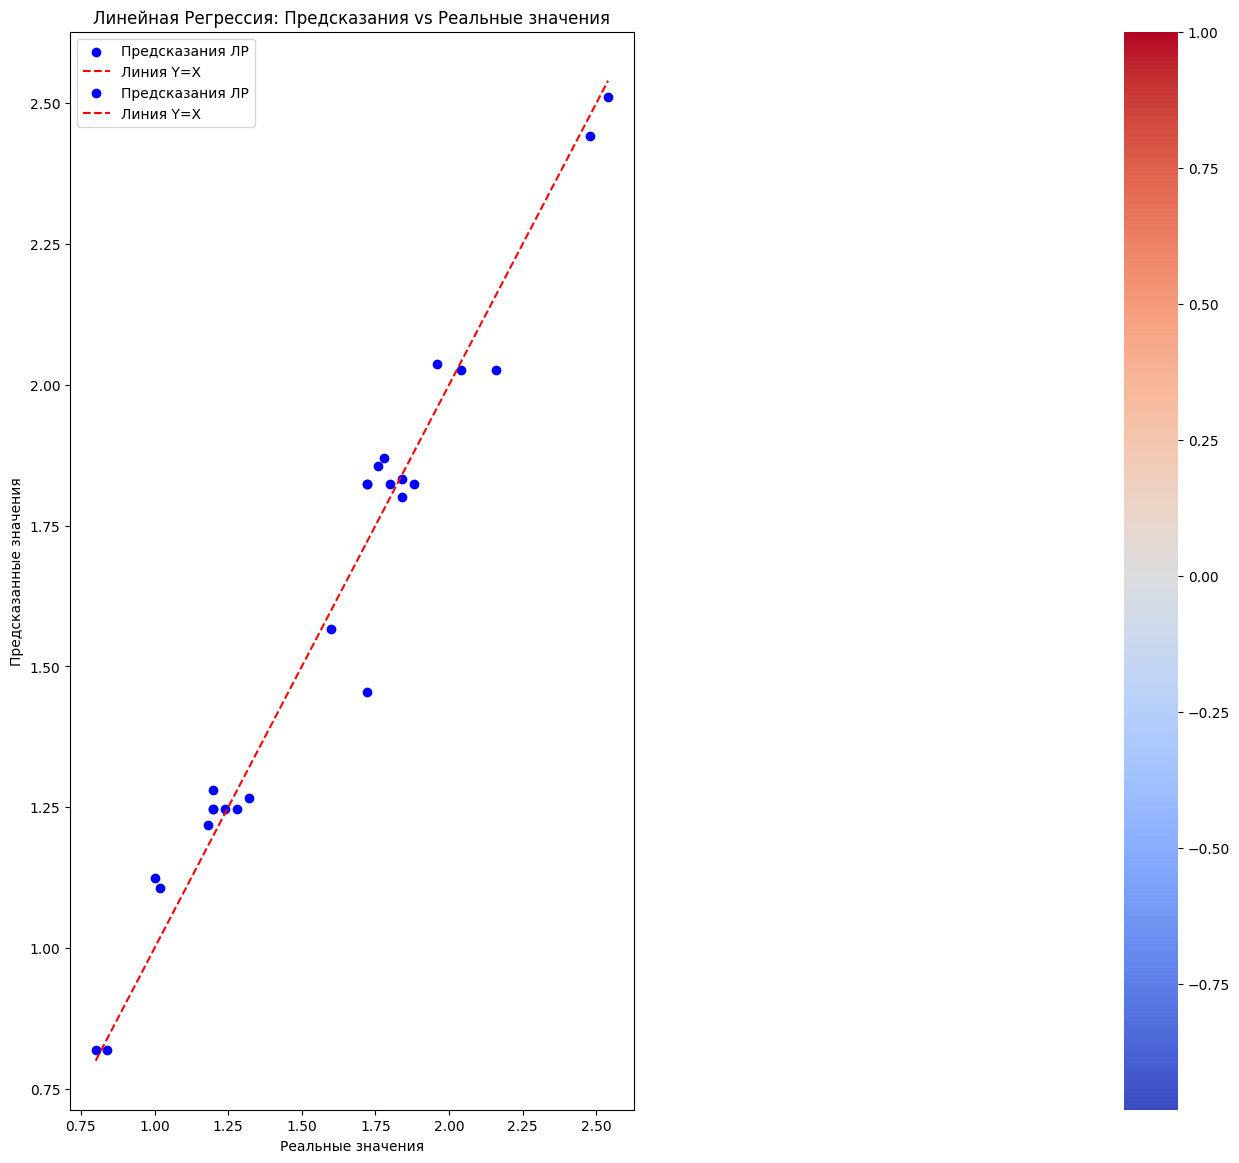

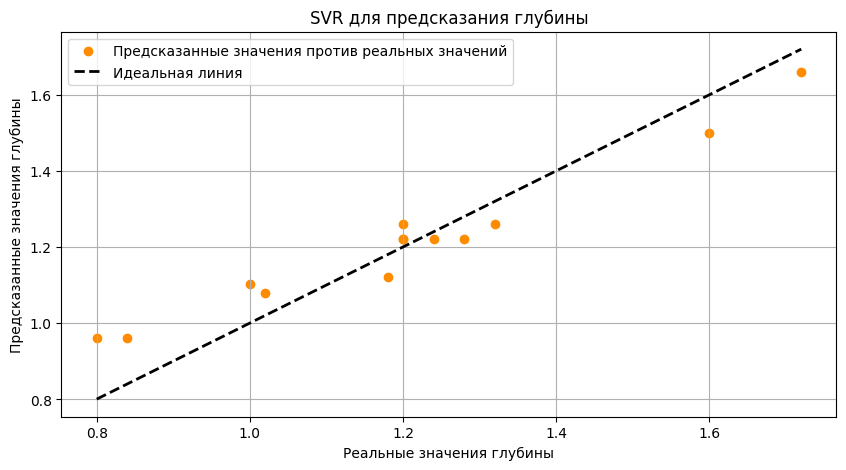

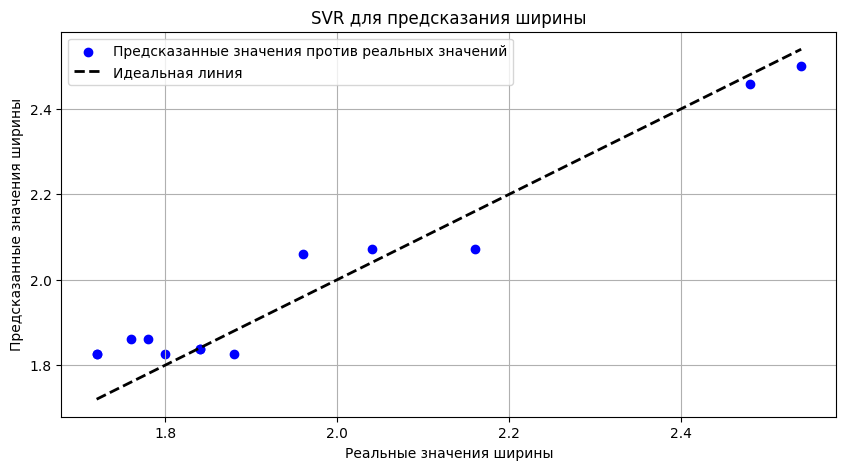

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
import xgboost as xgb
df=pd.read_csv('ebw_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.info())
#Удаляем дубликаты
df = df.drop_duplicates()
df_c=df
df_c.to_csv('cleaned_df_final_work.csv')
#Избавляемся от выбросов
def remove_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return df[(df[column] >=lower_bound)|(df[column]<=upper_bound)]
columns_for_remove_outliers=['IW', 'IF', 'VW', 'FP', 'Depth', 'Width']
for column in columns_for_remove_outliers:
  df_c=remove_outliers(df_c,column)
print(df_c.info())
df_c.describe()
#Проверяем нормальность распределения данных по графикам через Q-Q плот
columns_for_tests_and_visualisation=['IW', 'IF', 'VW', 'FP', 'Depth', 'Width']
for column in columns_for_tests_and_visualisation:
  plt.figure()
  st.probplot(df_c[column], dist='norm', plot=plt)
  plt.title(f'Q-Q график для колонки {column}')
  plt.savefig(f'Q-Q график для колонки {column}.png')
plt.figure(figsize = (16,14))
corr_matrix=df_c[columns_for_tests_and_visualisation].corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('Тепловая карта.png')
#Проверяем нормальность распределения данных тестом Андерсона
result=st.anderson(df_c['Depth'])
print(f'T-stat: {result.statistic}')
print(f'Critical values: {result.critical_values}')
print(f'Уровень значимости: {result.significance_level}')
for i in range(len(result.critical_values)):
  sl, cv=result.significance_level[i], result.critical_values[i]
  if result.statistic<cv:
    print(f'На уровле значимости {sl}% данные кажутся нормально распределенными')
  else:
    print(f'На уровле значимости {sl}% данные не кажутся нормально распределенными')
result=st.anderson(df_c['Width'])
print(f'T-stat: {result.statistic}')
print(f'Critical values: {result.critical_values}')
print(f'Уровень значимости: {result.significance_level}')
for i in range(len(result.critical_values)):
  sl, cv=result.significance_level[i], result.critical_values[i]
  if result.statistic<cv:
    print(f'На уровле значимости {sl}% данные кажутся нормально распределенными')
  else:
    print(f'На уровле значимости {sl}% данные не кажутся нормально распределенными')
#Построение модели линейная регрессия Depth
train_size = int(len(df) * 0.8)
train, test = df_c.iloc[:train_size], df_c.iloc[train_size:]
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Depth']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
X_test = test[['IW', 'IF', 'VW', 'FP']]
y_test = test['Depth']
y_pred = lin_reg.predict(X_test)
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Depth']
X = df_c[['IW', 'IF', 'VW', 'FP']]
y = df_c['Depth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)
print('LinearRegression_Depth')
print('MAE', mean_absolute_error(y_test, prediction_lr))
print('RMSE', np.sqrt(mean_squared_error(y_test, prediction_lr)))
# Расчет MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
# Расчет R²
r_squared = r2_score(y_test, y_pred)
print(f'R²: {r_squared:.2f}')
# Линейная регрессия график
plt.subplot(1, 2, 1)
plt.scatter(y_test, prediction_lr, color='blue', label='Предсказания ЛР')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Линия Y=X')
plt.title('Линейная Регрессия: Предсказания vs Реальные значения')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.savefig('Линейная Регрессия: Предсказания vs Реальные значения_Depth.png')
#Построение модели линейная регрессия Width
train_size = int(len(df) * 0.8)
train, test = df_c.iloc[:train_size], df_c.iloc[train_size:]
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Width']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
X_test = test[['IW', 'IF', 'VW', 'FP']]
y_test = test['Width']
y_pred = lin_reg.predict(X_test)
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Width']
X = df_c[['IW', 'IF', 'VW', 'FP']]
y = df_c['Width']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)
print('LinearRegression_Width')
print('MAE', mean_absolute_error(y_test, prediction_lr))
print('RMSE', np.sqrt(mean_squared_error(y_test, prediction_lr)))
# Расчет MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
# Расчет R²
r_squared = r2_score(y_test, y_pred)
print(f'R²: {r_squared:.2f}')
# Линейная регрессия график
plt.subplot(1, 2, 1)
plt.scatter(y_test, prediction_lr, color='blue', label='Предсказания ЛР')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Линия Y=X')
plt.title('Линейная Регрессия: Предсказания vs Реальные значения')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.savefig('Линейная Регрессия: Предсказания vs Реальные значения_Width.png')
#Построение модели XGBoost
train_size = int(len(df) * 0.8)
train, test = df_c.iloc[:train_size], df_c.iloc[train_size:]
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Depth']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
X_test = test[['IW', 'IF', 'VW', 'FP']]
y_test = test['Depth']
y_pred = lin_reg.predict(X_test)
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Depth']
X = df_c[['IW', 'IF', 'VW', 'FP']]
y = df_c['Depth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror')
xg_reg.fit(X_train, y_train)
prediction_xg = xg_reg.predict(X_test)
print('XGBboost_Depth')
print('MAE', mean_absolute_error(y_test, prediction_xg))
print('RMSE', np.sqrt(mean_squared_error(y_test, prediction_xg)))
# Расчет MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
# Расчет R²
r_squared = r2_score(y_test, y_pred)
print(f'R²: {r_squared:.2f}')
train_size = int(len(df) * 0.8)
train, test = df_c.iloc[:train_size], df_c.iloc[train_size:]
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Width']
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
X_test = test[['IW', 'IF', 'VW', 'FP']]
y_test = test['Width']
y_pred = lin_reg.predict(X_test)
X_train = train[['IW', 'IF', 'VW', 'FP']]
y_train = train['Width']
X = df_c[['IW', 'IF', 'VW', 'FP']]
y = df_c['Width']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror')
xg_reg.fit(X_train, y_train)
prediction_xg = xg_reg.predict(X_test)
print('XGBboost_Width')
print('MAE', mean_absolute_error(y_test, prediction_xg))
print('RMSE', np.sqrt(mean_squared_error(y_test, prediction_xg)))
# Расчет MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
# Расчет R²
r_squared = r2_score(y_test, y_pred)
print(f'R²: {r_squared:.2f}')
#Метод опорных векторов (SVM) для регрессии
X = df_c[['IW', 'IF', 'VW', 'FP']]
y_depth = df_c['Depth']
y_width = df_c['Width']
X_train, X_test, y_depth_train, y_depth_test = train_test_split(X, y_depth, test_size=0.2, random_state=42)
X_train, X_test, y_width_train, y_width_test = train_test_split(X, y_width, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Обучение модели для глубины
svr_depth = SVR(kernel='rbf')
svr_depth.fit(X_train, y_depth_train)
# Обучение модели для ширины
svr_width = SVR(kernel='rbf')
svr_width.fit(X_train, y_width_train)
# Прогнозирование для глубины
y_depth_pred = svr_depth.predict(X_test)
depth_mse = mean_squared_error(y_depth_test, y_depth_pred)
depth_r2 = r2_score(y_depth_test, y_depth_pred)
# Прогнозирование для ширины
y_width_pred = svr_width.predict(X_test)
width_mse = mean_squared_error(y_width_test, y_width_pred)
width_r2 = r2_score(y_width_test, y_width_pred)
# Вывод результатов
print('SVR results')
print(f'Depth: MSE = {depth_mse}, R² = {depth_r2}')
print(f'Width: MSE = {width_mse}, R² = {width_r2}')
plt.figure(figsize=(10, 5))
plt.scatter(y_depth_test, y_depth_pred, color='darkorange', label='Предсказанные значения против реальных значений')
plt.plot([y_depth_test.min(), y_depth_test.max()], [y_depth_test.min(), y_depth_test.max()], 'k--', lw=2, label='Идеальная линия')
plt.xlabel('Реальные значения глубины')
plt.ylabel('Предсказанные значения глубины')
plt.title('SVR для предсказания глубины')
plt.legend()
plt.grid(True)
plt.savefig('SVR_Depth.png')
plt.figure(figsize=(10, 5))
plt.scatter(y_width_test, y_width_pred, color='blue', label='Предсказанные значения против реальных значений')
plt.plot([y_width_test.min(), y_width_test.max()], [y_width_test.min(), y_width_test.max()], 'k--', lw=2, label='Идеальная линия')
plt.xlabel('Реальные значения ширины')
plt.ylabel('Предсказанные значения ширины')
plt.title('SVR для предсказания ширины')
plt.legend()
plt.grid(True)
plt.savefig('SVR_Width.png')
#Строим нейросеть
X = df_c[['IW', 'IF', 'VW', 'FP']]
y_depth = df_c['Depth']
y_width = df_c['Width']
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_depth_train, y_depth_test = train_test_split(X, y_depth, test_size=0.2, random_state=42)
_, _, y_width_train, y_width_test = train_test_split(X, y_width, test_size=0.2, random_state=42)
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Построение нейросети для предсказания глубины
model_depth = Sequential()
model_depth.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Первый слой
model_depth.add(Dense(16, activation='relu'))  # Второй слой
model_depth.add(Dense(1, activation='linear'))  # Выходной слой
# Компиляция модели
model_depth.compile(loss='mean_squared_error', optimizer='adam')
# Обучение модели
model_depth.fit(X_train, y_depth_train, epochs=100, batch_size=10, verbose=0)
# Прогнозирование для глубины
y_depth_pred = model_depth.predict(X_test)
# Оценка модели для глубины
depth_mse = mean_squared_error(y_depth_test, y_depth_pred)
depth_r2 = r2_score(y_depth_test, y_depth_pred)
# Построение нейросети для предсказания ширины
model_width = Sequential()
model_width.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Первый слой
model_width.add(Dense(16, activation='relu'))  # Второй слой
model_width.add(Dense(1, activation='linear'))  # Выходной слой
# Компиляция модели
model_width.compile(loss='mean_squared_error', optimizer='adam')
# Обучение модели
model_width.fit(X_train, y_width_train, epochs=100, batch_size=10, verbose=0)
# Прогнозирование для ширины
y_width_pred = model_width.predict(X_test)
# Оценка модели для ширины
width_mse = mean_squared_error(y_width_test, y_width_pred)
width_r2 = r2_score(y_width_test, y_width_pred)
# Вывод результатов
print(f'Depth: MSE = {depth_mse}, R² = {depth_r2}')
print(f'Width: MSE = {width_mse}, R² = {width_r2}')